## Import Libraries

In [145]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Rescaling, AveragePooling2D
from tensorflow.keras.layers import Resizing, Rescaling, Input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import os

In [146]:
# it is important to have tensorflow<2.11 for it to use gpu for its computations
tf.__version__

'2.10.1'

In [147]:
# listing the CPU and GPU of your device
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2411368352246888852
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2230059008
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1246674901618045404
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [148]:
# making sure that tensorflow is using the gpu
# if output is [] then either you don't have a gpu or tensorflow cannot recognise it
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## LeNet Architecture

### Load and Modify Dataset

In [149]:
LeNetTrainDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/training',
    image_size = (64, 64),
    batch_size = 16,
    seed = 123
)

Found 68 files belonging to 2 classes.


In [150]:
LeNetValDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/validation',
    image_size = (64, 64),
    batch_size = 16,
    seed = 123
)

Found 6 files belonging to 2 classes.


In [44]:
LeNetTestDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/testing',
    image_size = (64, 64),
    batch_size = 16,
    seed = 123
)

Found 30 files belonging to 2 classes.


In [45]:
ClassNames = LeNetTrainDS.class_names

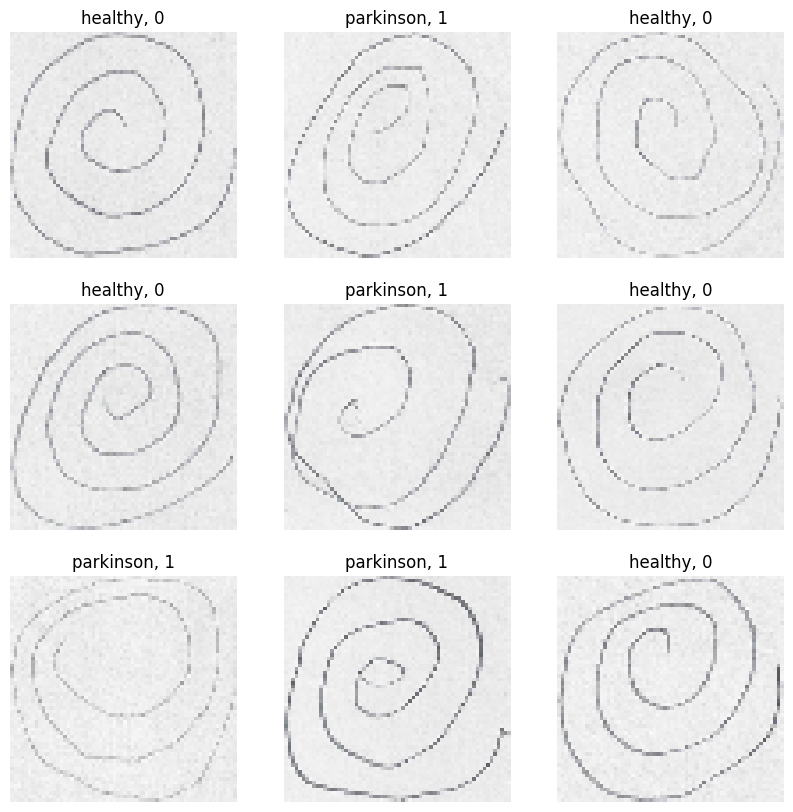

In [66]:
plt.figure(figsize=(10, 10))
for Images, Labels in LeNetTrainDS.take(1):
    for i in range(1, 10):
        axes = plt.subplot(3, 3, i)
        plt.imshow(Images[i].numpy().astype("uint8"))
        plt.title(f"{ClassNames[Labels[i]]}, {Labels[i]}")
        plt.axis("off")

In [68]:
for Images, Labels in LNTrainDS:
    print(Images.shape)
    print(Labels.shape)
    break

(16, 64, 64, 3)
(16,)


### Data Augmentation

In [50]:
DataAugmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

### Model Configuration

In [69]:
AUTOTUNE = tf.data.AUTOTUNE

LNTrainDS = LeNetTrainDS.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
LNValDS = LeNetValDS.cache().prefetch(buffer_size=AUTOTUNE)

In [85]:
LeNet = Sequential([
    Input(shape = (64, 64, 3)),
    DataAugmentation,
    Rescaling(1./255),
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Dense(120, activation='tanh'),
    Flatten(),
    Dense(84, activation = 'tanh'),
    Dense(1, activation = 'sigmoid')
    ]
)

In [88]:
LeNet.compile(
    optimizer='adam',
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [89]:
LeNet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 6)         456       
                                                                 
 average_pooling2d_16 (Avera  (None, 30, 30, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 6)         906       
                                                                 
 average_pooling2d_17 (Avera  (None, 13, 13, 6)        0         
 gePooling2D)                                        

### Model Training

In [90]:
LogDir = 'LNLogs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = LogDir)

In [91]:
epochs = 20
LeNetHist = LeNet.fit(
    LNTrainDS,
    epochs=epochs,
    validation_data=LNValDS,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
5/5 [==============================] - 3s 133ms/step - loss: 3.8608 - accuracy: 0.3971 - val_loss: 2.4792 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 0s 67ms/step - loss: 2.2911 - accuracy: 0.4559 - val_loss: 0.7927 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 0s 63ms/step - loss: 0.8288 - accuracy: 0.6029 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 0s 72ms/step - loss: 0.8084 - accuracy: 0.5441 - val_loss: 0.7256 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 0s 52ms/step - loss: 0.7893 - accuracy: 0.4412 - val_loss: 0.7988 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 0s 57ms/step - loss: 0.7736 - accuracy: 0.4853 - val_loss: 0.6846 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 0s 60ms/step - loss: 0.7194 - accuracy: 0.4412 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 8/20
5/5 [==========

### Visualization

In [92]:
iters = range(epochs)
TrainingAcc = LeNetHist.history['accuracy']
ValAcc = LeNetHist.history['val_accuracy']
TrainingLoss = LeNetHist.history['loss']
ValLoss = LeNetHist.history['val_loss']

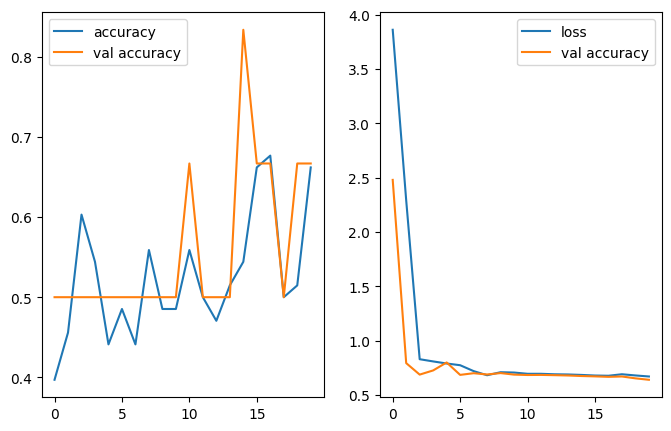

In [93]:
plt.figure(figsize = (8, 5))
plt.subplot(1, 2, 1)
plt.plot(iters, TrainingAcc, label = "accuracy")
plt.plot(iters, ValAcc, label = "val accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(iters, TrainingLoss, label = "loss")
plt.plot(iters, ValLoss, label = "val accuracy")
plt.legend()
plt.show()

### Testing and Evaluating

In [94]:
Normalize = Rescaling(1./255)
NormLNTestDS = LeNetTestDS.map(lambda x, y: (Normalize(x), y))

In [95]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [96]:
for batch in NormLNTestDS.as_numpy_iterator(): 
    X, y = batch
    yhat = LeNet.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 265ms/step


In [97]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.5, Recall: 1.0, Accuracy: 0.5


### Saving Model

In [98]:
from tensorflow.keras.models import load_model

In [99]:
LeNet.save(os.path.join('models','LeNet.h5'))

### Predicting on New Model

In [100]:
model = load_model('models/LeNet.h5')

In [103]:
HealthyImg = cv2.imread('test_healthy.png')
ParkImg = cv2.imread('test_parkinson.png')

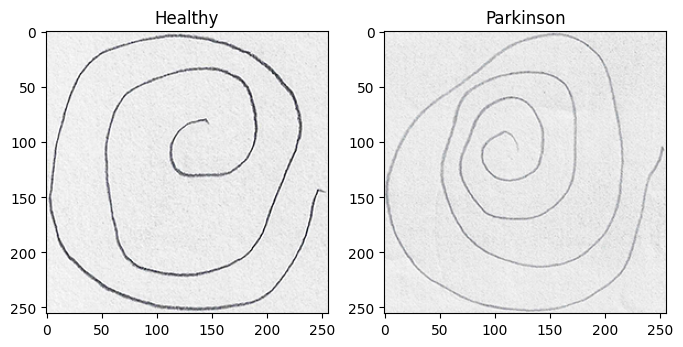

In [104]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 1)
plt.title("Healthy")
plt.imshow(cv2.cvtColor(HealthyImg, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Parkinson")
plt.imshow(cv2.cvtColor(ParkImg, cv2.COLOR_BGR2RGB))

In [105]:
def ClassImage(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 
    pred = model.predict(np.expand_dims(img/255, 0))
    healthy_prob = pred[0][0]
    parkinsons_prob = 1 - healthy_prob

    print(f"Healthy: {healthy_prob*100:.2f}%, Parkinson's: {parkinsons_prob*100:.2f}%")

In [107]:
ClassImage(cv2.resize(HealthyImg, (64, 64)))

1/1 [==============================] - 0s 340ms/step
Healthy: 57.43%, Parkinson's: 42.57%


In [108]:
ClassImage(cv2.resize(ParkImg, (64, 64)))

1/1 [==============================] - 0s 52ms/step
Healthy: 57.45%, Parkinson's: 42.55%


## Load Dataset for Other Architectures

In [108]:
training = tf.keras.utils.image_dataset_from_directory(
    PathDir,
    batch_size = 32,
    image_size = (256, 256),
    validation_split = 0.2,
    subset = "training",
    seed = 123
)

Found 3600 files belonging to 2 classes.
Using 2880 files for training.


In [109]:
validation = tf.keras.utils.image_dataset_from_directory(
    PathDir,
    batch_size = 32,
    image_size = (256, 256),
    validation_split = 0.2,
    subset = "validation",
    seed = 123
)

Found 3600 files belonging to 2 classes.
Using 720 files for validation.


In [110]:
TrainDS = training.map(Normalize)
ValDS = validation.map(Normalize)

In [111]:
for i, l in TrainDS.take(1):
    print(np.min(i[0]), np.max(i[0]))
    break

0.007843138 1.0


## Open Source Architectre
URL : https://github.com/not-AVP/image_classifier/blob/master/ImageClassifierCNN.ipynb

### Load Model

In [133]:
OSMTrainDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/training',
    image_size = (256, 256),
    batch_size = 16,
    seed = 123
)

Found 68 files belonging to 2 classes.


In [124]:
OSMTestDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/testing',
    image_size = (256, 256),
    batch_size = 16,
    seed = 123
)

Found 30 files belonging to 2 classes.


In [134]:
OSMValDS = tf.keras.utils.image_dataset_from_directory(
    'drawings/spiral/validation',
    image_size = (256, 256),
    batch_size = 16,
    seed = 123
)

Found 6 files belonging to 2 classes.


### Model Configuration

In [127]:
InpShape = (256, 256, 3)

In [128]:
OSModel = Sequential([
        Input(InpShape),
        DataAugmentation,
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        Conv2D(32, kernel_size=(3, 3),  activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(64, kernel_size=(3, 3),  activation='relu'),
        Conv2D(64, kernel_size=(3, 3),  activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(128, kernel_size=(3, 3),  activation='relu'),
        Conv2D(128, kernel_size=(3, 3),  activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, kernel_size=(3, 3),  activation='relu'),
        Conv2D(256, kernel_size=(3, 3),  activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    
])

In [129]:
OSModel.compile(
    optimizer='adam',
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [130]:
OSModel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, None, None, 3)     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_35 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_36 (Conv2D)          (None, 123, 123, 64)      18496     
                                                                 
 conv2d_37 (Conv2D)          (None, 121, 121, 64)      36928     
                                                     

### Model Training

In [131]:
LogDir = 'OSModelLogs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = LogDir)

In [135]:
epochs = 20
OSModelHist = OSModel.fit(
    OSMTrainDS,
    epochs = epochs,
    validation_data = OSMValDS,
    callbacks=[tensorboard_callback]
)

Epoch 1/20


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

## AlexNet Architecture

### Model Configuration

In [139]:
AlexNet = Sequential([
        Input(InpShape),
        DataAugmentation,
        # First Convolutional Layer
        Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        
        # Second Convolutional Layer
        Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        BatchNormalization(),
        
        # Third Convolutional Layer
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        
        # Fourth Convolutional Layer
        Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        
        # Fifth Convolutional Layer
        Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        # Flatten layer
        Flatten(),
        
        # Fully Connected Layers - reduced size for medical classification
        Dense(2048, activation='relu'),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        Dropout(0.5),
        
        # Output Layer - changed to 1 unit with sigmoid for binary classification
        Dense(1, activation='sigmoid')
])

In [140]:
AlexNet.compile(
    optimizer='adam',
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [141]:
AlexNet.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, None, None, 3)     0         
                                                                 
 conv2d_47 (Conv2D)          (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_48 (Conv2D)          (None, 30, 30, 256)       614656    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 256)    

### Model Training

In [142]:
LogDir = 'AlexNetLogs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = LogDir)

In [144]:
epochs = 20
AlexNetHist = AlexNet.fit(
    OSMTrainDS,
    epochs = epochs,
    validation_data = OSMValDS,
    callbacks=[tensorboard_callback]
)

Epoch 1/20
5/5 [==============================] - 7s 646ms/step - loss: 6.7014 - accuracy: 0.4265 - val_loss: 22.3746 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 1s 131ms/step - loss: 0.9709 - accuracy: 0.5588 - val_loss: 88.4637 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 1s 126ms/step - loss: 0.7865 - accuracy: 0.5000 - val_loss: 6.4961 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 1s 143ms/step - loss: 0.6993 - accuracy: 0.5000 - val_loss: 7.6713 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 1s 121ms/step - loss: 0.6888 - accuracy: 0.4706 - val_loss: 25.1371 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 1s 125ms/step - loss: 0.6948 - accuracy: 0.6029 - val_loss: 15.3715 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 1s 132ms/step - loss: 0.6827 - accuracy: 0.5735 - val_loss: 32.3750 - val_accuracy: 0.5000
Epoch 8/20
5/5 